#Installation of pandas library

In [1]:
!pip install pandas

In [ ]:
#Installation of Matplotlib for visualization

In [2]:
!pip install matplotlib

#Importing sqlite3 for querying

In [33]:
import sqlite3

conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

conn.commit()

In [29]:
sample_data = [
('Laptop', 5, 600.0),
('Mouse', 10, 20.0),
('Keyboard', 7, 30.0),
('Monitor', 3, 150.0)
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

conn.commit()

In [37]:
import pandas as pd

query= "SELECT*FROM sales"
df=pd.read_sql(query,conn)
df.head()

,product,quantity,price
0,Laptop,5,600.0
1,Mouse,10,20.0
2,Keyboard,7,30.0
3,Monitor,3,150.0
4,Laptop,5,600.0


In [39]:
query="SELECT *FROM sales WHERE quantity>8"
pd.read_sql(query,conn)

,product,quantity,price
0,Mouse,10,20.0
1,Mouse,10,20.0
2,Mouse,10,20.0
3,Mouse,10,20.0


In [41]:
query = """
SELECT product, SUM(quantity) AS total_quantity, SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)
df.head()

,product,total_quantity,total_revenue
0,Keyboard,28,840.0
1,Laptop,20,12000.0
2,Monitor,12,1800.0
3,Mouse,40,800.0


In [42]:
print(df)

    product  total_quantity  total_revenue
0  Keyboard              28          840.0
1    Laptop              20        12000.0
2   Monitor              12         1800.0
3     Mouse              40          800.0


#Bar chart for total quantity sold

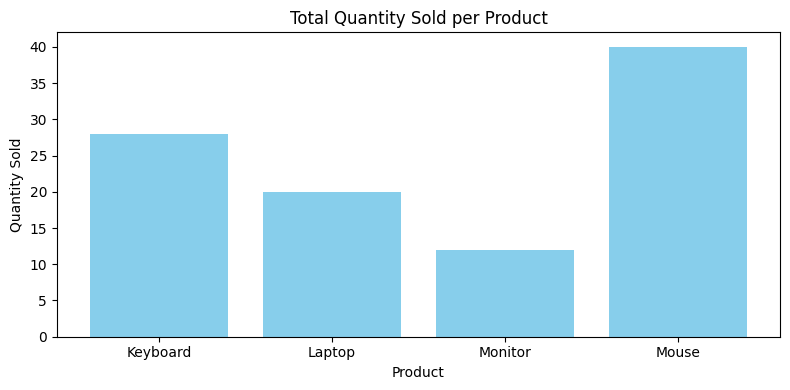

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.bar(df['product'], df['total_quantity'], color='skyblue')
plt.title('Total Quantity Sold per Product')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.tight_layout()
plt.show()

#Bar Chart for total revenue

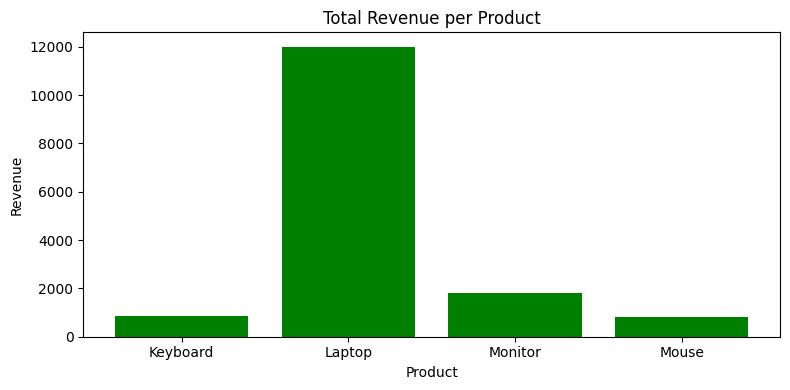

In [45]:
plt.figure(figsize=(8, 4))
plt.bar(df['product'], df['total_revenue'], color='green')
plt.title('Total Revenue per Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()